In [1]:
#load required library
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load dataest
df = pd.read_csv('dataset_med.csv')
df.head()

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64,Male,Sweden,05 04 2016,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,10 09 2017,0
1,2,50,Female,Netherlands,20 04 2023,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,17 06 2024,1
2,3,65,Female,Hungary,05 04 2023,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,09 04 2024,0
3,4,51,Female,Belgium,05 02 2016,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,23 04 2017,0
4,5,37,Male,Luxembourg,29 11 2023,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,08 01 2025,0


In [3]:
#remove unused columns
df.drop(columns=['id', 'end_treatment_date', 'diagnosis_date'], inplace=True)

In [4]:
#check shape
df.shape

(890000, 14)

In [5]:
#check statistical report
df.describe()

,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived
count,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000
mean,55.007008,30.494172,233.633916,0.750024,0.469740,0.225956,0.088157,0.220229
std,9.994485,8.368539,43.432278,0.432999,0.499084,0.418211,0.283524,0.414401
min,4.000000,16.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,23.300000,196.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,30.500000,242.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,62.000000,37.700000,271.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,104.000000,45.000000,300.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
#check information about each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   age                890000 non-null  int64  
 1   gender             890000 non-null  object 
 2   country            890000 non-null  object 
 3   cancer_stage       890000 non-null  object 
 4   family_history     890000 non-null  object 
 5   smoking_status     890000 non-null  object 
 6   bmi                890000 non-null  float64
 7   cholesterol_level  890000 non-null  int64  
 8   hypertension       890000 non-null  int64  
 9   asthma             890000 non-null  int64  
 10  cirrhosis          890000 non-null  int64  
 11  other_cancer       890000 non-null  int64  
 12  treatment_type     890000 non-null  object 
 13  survived           890000 non-null  int64  
dtypes: float64(1), int64(7), object(6)
memory usage: 95.1+ MB


In [7]:
#checking numerical column
df.select_dtypes(include=[int,float]).columns

Index(['age', 'bmi', 'cholesterol_level', 'hypertension', 'asthma',
       'cirrhosis', 'other_cancer', 'survived'],
      dtype='object')

In [8]:
#checking categorical columns
df.select_dtypes(include=object).columns

Index(['gender', 'country', 'cancer_stage', 'family_history', 'smoking_status',
       'treatment_type'],
      dtype='object')

In [9]:
#find numerical column
num_col = ['age', 'bmi', 'cholesterol_level', 'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'survived']

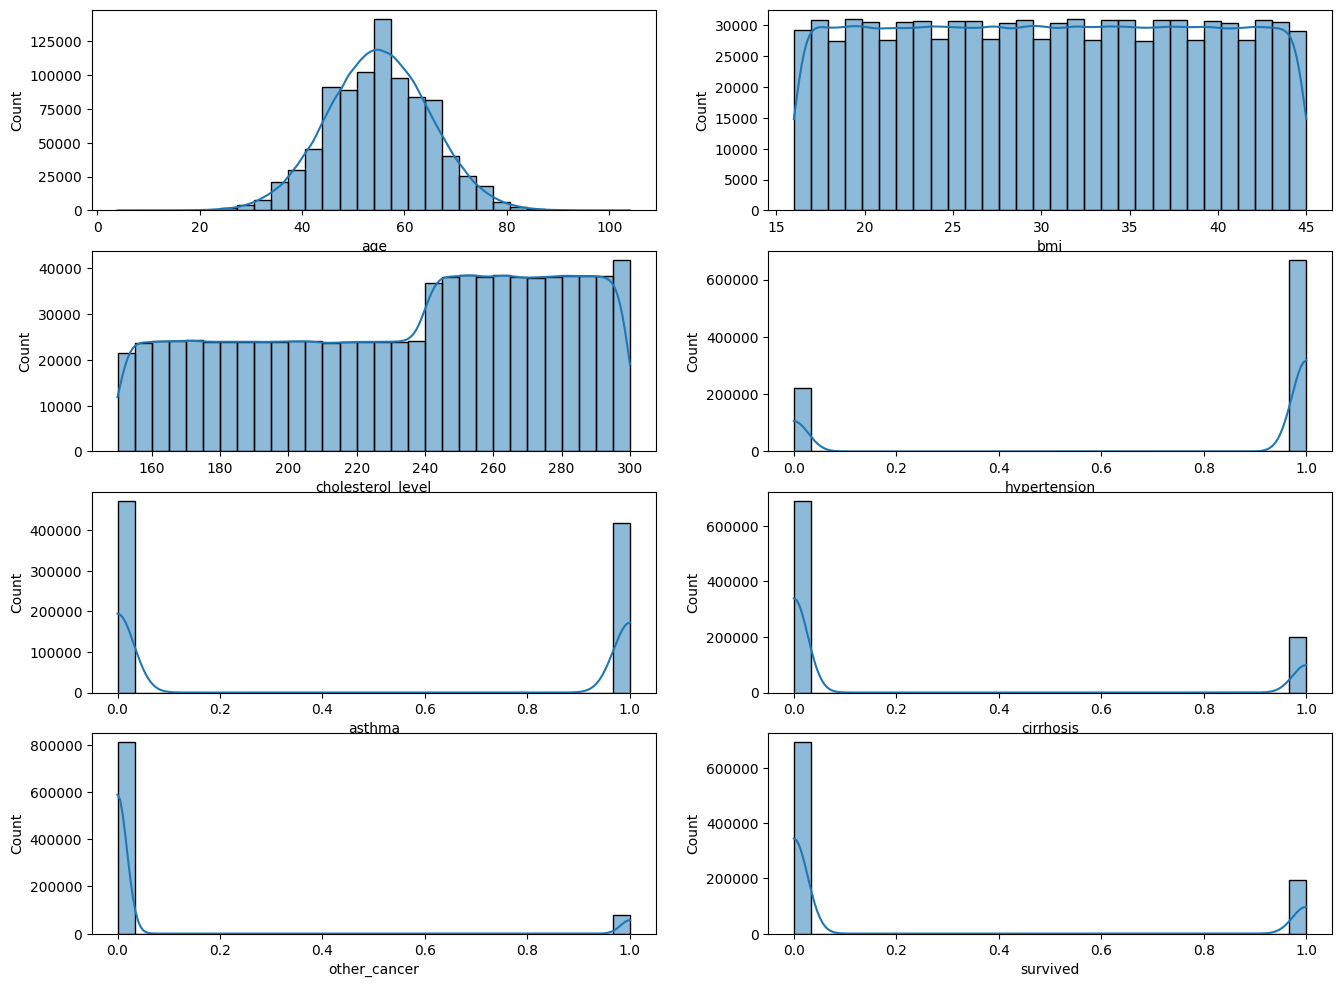

In [10]:
#Data distribution
plt.figure(figsize=(16, 12))
for i, col in enumerate(num_col):
    plt.subplot(4,2,i+1)
    sns.histplot(df[col], bins=30, kde=True)

above all Numerical columns distribution is correct and range in thier scaled.

But Survived columns having Imbalanced.

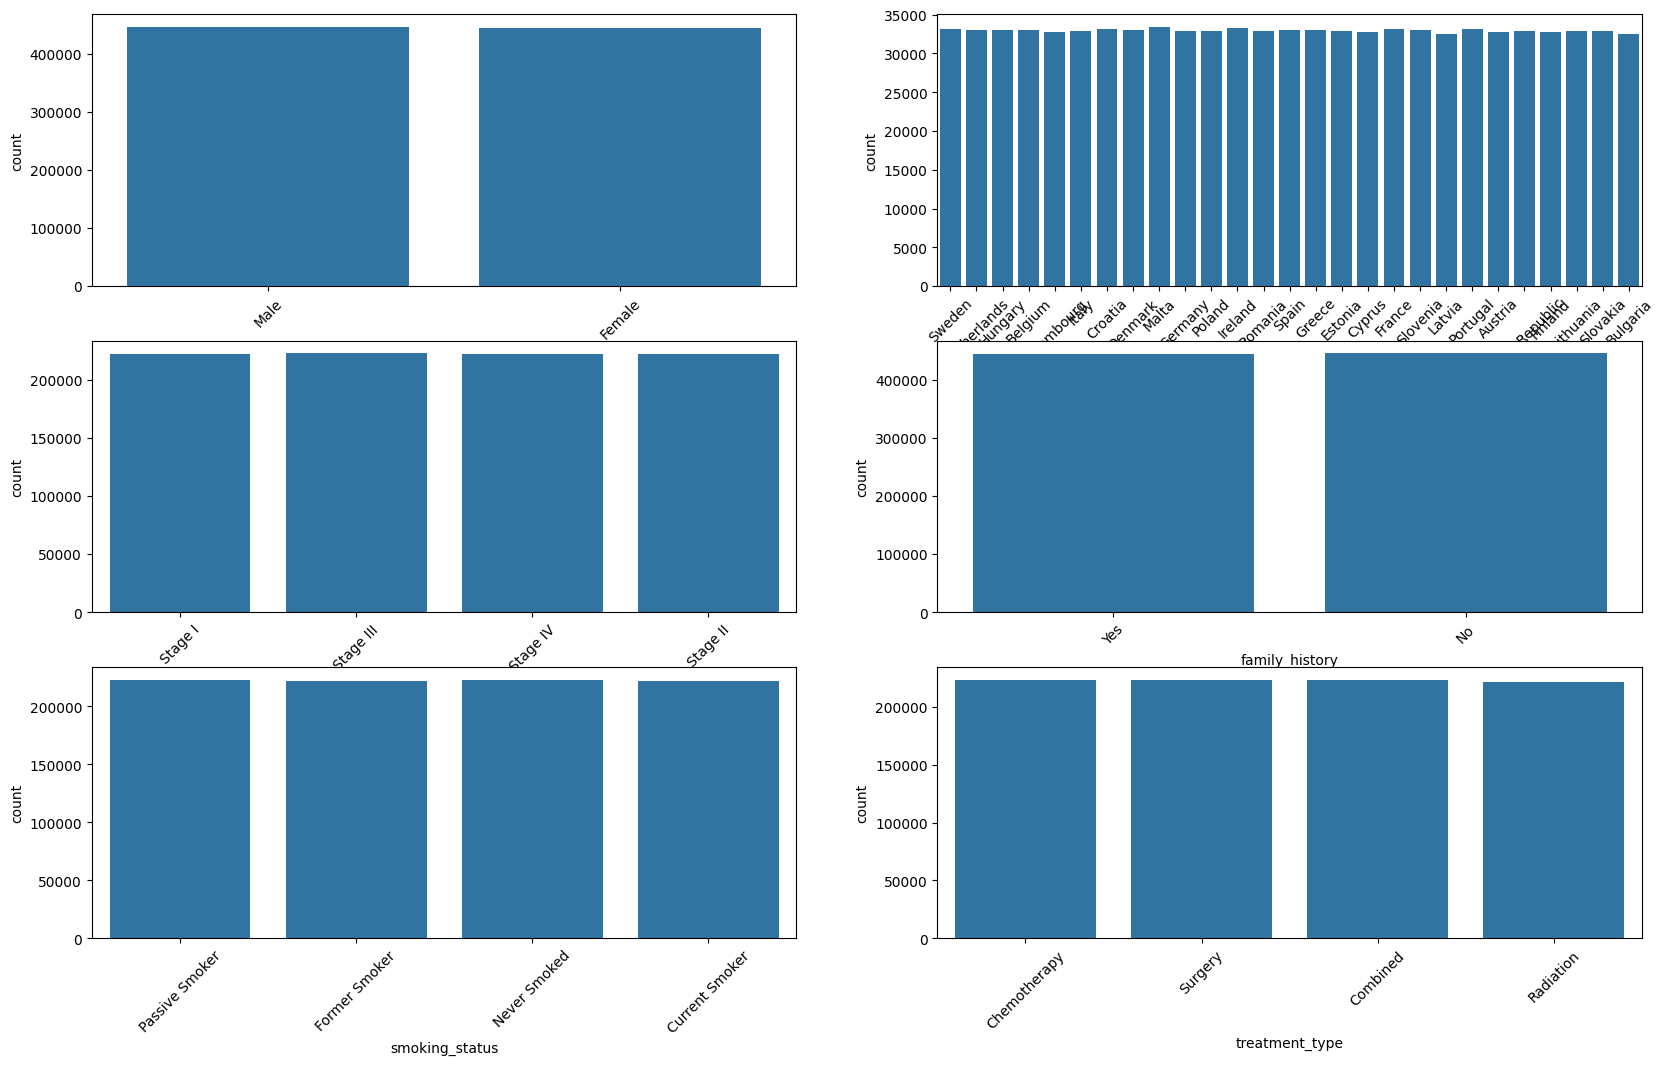

In [11]:
#categorical columns distribution
col = ['gender', 'country', 'cancer_stage', 'family_history','smoking_status', 'treatment_type']
plt.figure(figsize=(20, 12))
for i, col in enumerate(col):
    plt.subplot(3,2,i+1)
    sns.countplot(x=df[col])
    plt.xticks(rotation=45)
    

In [12]:
#find categorical columns
df.select_dtypes(include=object).columns

Index(['gender', 'country', 'cancer_stage', 'family_history', 'smoking_status',
       'treatment_type'],
      dtype='object')

In [13]:
#make list of categorical columns
cat_col = ['gender', 'country', 'cancer_stage', 'family_history', 'smoking_status', 'treatment_type']

In [14]:
#load onehot_encoder and fit in categorical col
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)
onehot_encoder.fit(df[cat_col])

#transform the onehotencoder to the dataset
encoded_col = onehot_encoder.transform(df[cat_col])
encoded_df = pd.DataFrame(encoded_col, columns=onehot_encoder.get_feature_names_out(cat_col))
df_encoded = pd.concat([df.drop(columns=cat_col), encoded_df], axis=1)
df.shape

(890000, 14)

In [15]:
#check encoded df
df_encoded.head()

,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived,gender_Male,country_Belgium,...,cancer_stage_Stage II,cancer_stage_Stage III,cancer_stage_Stage IV,family_history_Yes,smoking_status_Former Smoker,smoking_status_Never Smoked,smoking_status_Passive Smoker,treatment_type_Combined,treatment_type_Radiation,treatment_type_Surgery
0,64,29.4,199,0,0,1,0,0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,50,41.2,280,1,1,0,0,1,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,65,44.0,268,1,1,0,0,0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,51,43.0,241,1,1,0,0,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,37,19.7,178,0,0,0,0,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [16]:
#checking columns
df_encoded.columns

Index(['age', 'bmi', 'cholesterol_level', 'hypertension', 'asthma',
       'cirrhosis', 'other_cancer', 'survived', 'gender_Male',
       'country_Belgium', 'country_Bulgaria', 'country_Croatia',
       'country_Cyprus', 'country_Czech Republic', 'country_Denmark',
       'country_Estonia', 'country_Finland', 'country_France',
       'country_Germany', 'country_Greece', 'country_Hungary',
       'country_Ireland', 'country_Italy', 'country_Latvia',
       'country_Lithuania', 'country_Luxembourg', 'country_Malta',
       'country_Netherlands', 'country_Poland', 'country_Portugal',
       'country_Romania', 'country_Slovakia', 'country_Slovenia',
       'country_Spain', 'country_Sweden', 'cancer_stage_Stage II',
       'cancer_stage_Stage III', 'cancer_stage_Stage IV', 'family_history_Yes',
       'smoking_status_Former Smoker', 'smoking_status_Never Smoked',
       'smoking_status_Passive Smoker', 'treatment_type_Combined',
       'treatment_type_Radiation', 'treatment_type_Surgery'],


In [17]:
#split data in input and target variable
X = df_encoded.drop(columns=['survived'])
y = df_encoded['survived']

X.shape, y.shape

((890000, 44), (890000,))

In [18]:
#loading requeired library, randomforestclassfier and metrix.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [19]:
#split the input feature and target variable in to xtrain, ytrain, xtest and y_test
xtrain, xtest, ytrain, ytest = train_test_split(X, y, random_state=42, test_size=.2)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((712000, 44), (178000, 44), (712000,), (178000,))

In [20]:
#model creating using RF

rfc = RandomForestClassifier(random_state=42)
rfc.fit(xtrain, ytrain)


RandomForestClassifier(random_state=42)

In [21]:
#predict the model
rfc_pred = rfc.predict(xtest)

#checking classification report and confusion metrix
print(classification_report(ytest, rfc_pred))
print(confusion_matrix(ytest, rfc_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.87    138639
           1       0.23      0.00      0.01     39361

    accuracy                           0.78    178000
   macro avg       0.50      0.50      0.44    178000
weighted avg       0.66      0.78      0.68    178000

[[137981    658]
 [ 39169    192]]


##### above F1-score for 1 is highly biased that meeans imbalanced dataset. So, we will remove imbalanced 

In [22]:
#load smote library for imbalanced data
from imblearn.over_sampling import SMOTE
sm = SMOTE()

In [23]:
#appling SMOTE
X_resamble, y_resamble = sm.fit_resample(X, y)

In [24]:
#split dataset into train, test.
xtrain, xtest, ytrain, ytest = train_test_split(X_resamble, y_resamble, random_state=42, test_size=.2)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((1110393, 44), (277599, 44), (1110393,), (277599,))

In [25]:
#RF model using.
rfc_imbalanced = RandomForestClassifier(random_state=42)
#fitting the dataset.
rfc_imbalanced.fit(xtrain, ytrain)

RandomForestClassifier(random_state=42)

In [26]:
#predict the model
rfc_imb_pred = rfc_imbalanced.predict(xtest)

#checking the classification and confution metrix
print(classification_report(ytest, rfc_imb_pred))
print(confusion_matrix(ytest, rfc_imb_pred))

              precision    recall  f1-score   support

           0       0.78      0.97      0.87    138614
           1       0.97      0.73      0.83    138985

    accuracy                           0.85    277599
   macro avg       0.87      0.85      0.85    277599
weighted avg       0.87      0.85      0.85    277599

[[135074   3540]
 [ 38027 100958]]


In [27]:
print(accuracy_score(ytest, rfc_imb_pred))

0.8502624288992395


##### our model has 85% accuracy.

In [28]:
#now save our model.
import joblib

#saving model
joblib.dump(rfc_imbalanced, 'random_forest_model.pkl')

#save onehotencoder
joblib.dump(onehot_encoder, 'onehot_encoder.pkl')

['onehot_encoder.pkl']

In [29]:
rfc_imbalanced.feature_importances_

array([0.10428272, 0.12043656, 0.11633123, 0.01323727, 0.01100567,
       0.01210045, 0.0094233 , 0.06336654, 0.0063427 , 0.00628626,
       0.00646505, 0.00609679, 0.00604109, 0.00626547, 0.00581283,
       0.00584679, 0.00741864, 0.00632842, 0.00645128, 0.00654287,
       0.00626022, 0.00654555, 0.0060309 , 0.00643853, 0.00615368,
       0.00616094, 0.00571796, 0.00586206, 0.00640378, 0.00598467,
       0.00647707, 0.00628602, 0.00600316, 0.00682076, 0.03497755,
       0.03494464, 0.03319997, 0.06320513, 0.03969594, 0.03628118,
       0.03503372, 0.03706084, 0.03588206, 0.03649175])

In [30]:
rfc_imbalanced.feature_names_in_

array(['age', 'bmi', 'cholesterol_level', 'hypertension', 'asthma',
       'cirrhosis', 'other_cancer', 'gender_Male', 'country_Belgium',
       'country_Bulgaria', 'country_Croatia', 'country_Cyprus',
       'country_Czech Republic', 'country_Denmark', 'country_Estonia',
       'country_Finland', 'country_France', 'country_Germany',
       'country_Greece', 'country_Hungary', 'country_Ireland',
       'country_Italy', 'country_Latvia', 'country_Lithuania',
       'country_Luxembourg', 'country_Malta', 'country_Netherlands',
       'country_Poland', 'country_Portugal', 'country_Romania',
       'country_Slovakia', 'country_Slovenia', 'country_Spain',
       'country_Sweden', 'cancer_stage_Stage II',
       'cancer_stage_Stage III', 'cancer_stage_Stage IV',
       'family_history_Yes', 'smoking_status_Former Smoker',
       'smoking_status_Never Smoked', 'smoking_status_Passive Smoker',
       'treatment_type_Combined', 'treatment_type_Radiation',
       'treatment_type_Surgery'], dtype

In [31]:
#checing the columns
df.columns

Index(['age', 'gender', 'country', 'cancer_stage', 'family_history',
       'smoking_status', 'bmi', 'cholesterol_level', 'hypertension', 'asthma',
       'cirrhosis', 'other_cancer', 'treatment_type', 'survived'],
      dtype='object')

In [32]:
#checking unique variable in each categorical columns
for i in (df.select_dtypes(include=object)):
    print(f'df{[i]} : {df[i].unique()}')

df['gender'] : ['Male' 'Female']
df['country'] : ['Sweden' 'Netherlands' 'Hungary' 'Belgium' 'Luxembourg' 'Italy' 'Croatia'
 'Denmark' 'Malta' 'Germany' 'Poland' 'Ireland' 'Romania' 'Spain' 'Greece'
 'Estonia' 'Cyprus' 'France' 'Slovenia' 'Latvia' 'Portugal' 'Austria'
 'Czech Republic' 'Finland' 'Lithuania' 'Slovakia' 'Bulgaria']
df['cancer_stage'] : ['Stage I' 'Stage III' 'Stage IV' 'Stage II']
df['family_history'] : ['Yes' 'No']
df['smoking_status'] : ['Passive Smoker' 'Former Smoker' 'Never Smoked' 'Current Smoker']
df['treatment_type'] : ['Chemotherapy' 'Surgery' 'Combined' 'Radiation']


# Finish !
## Deepak Kumar.

Thank you ! 
